In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.float_format','{:.0f}'.format)

# Importing dataset
data = pd.read_excel('datasets/Online Retail.xlsx')

data.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
117618,546392,22470,HEART OF WICKER LARGE,1,2011-03-11 14:15:00,3,14587,United Kingdom
49222,540508,21078,SET/20 STRAWBERRY PAPER NAPKINS,2,2011-01-09 11:20:00,1,14810,United Kingdom
292665,562558,22383,LUNCH BAG SUKI DESIGN,1,2011-08-05 16:43:00,2,13451,United Kingdom


In [3]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# Missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Data tinme period
print('Data since: {} to {}'.format(min(data['InvoiceDate']), max(data['InvoiceDate'])))

Data since: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [6]:
# Drop instances where 'CustomerID' is null value
data = data.dropna(subset=['CustomerID'], axis=0)

data['CustomerID'] = data['CustomerID'].astype('int')

# Calculate 
data['Sales'] = data.UnitPrice * data.Quantity

data['InvoiceDate'] = data['InvoiceDate'].dt.date

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3,17850,United Kingdom,20


In [7]:
# Extract the year and month 
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

# Order month
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)

# Data group by customer
data['CohortMonth'] = data.groupby('CustomerID')['InvoiceMonth'].transform('min')

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,3,17850,United Kingdom,15,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,3,17850,United Kingdom,22,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01


In [8]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Assign time offset value
order_year, order_month, _ = get_date_int(data, 'InvoiceMonth')

# Integer cohort year and month 
cohort_year, cohort_month, _ = get_date_int(data, 'CohortMonth')

#
years_diff = order_year - cohort_year

#
months_diff = order_month - cohort_month

#
data['CohortIndex'] = years_diff * 12 + months_diff 

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,3,17850,United Kingdom,15,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,3,17850,United Kingdom,22,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3,17850,United Kingdom,20,2010-12-01,2010-12-01,0


## COHORT ANALYSIS

In [9]:
#
grouping = data.groupby(['CohortMonth', 'CohortIndex'])

#
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

# Reseting index
cohort_data = cohort_data.reset_index()

# Pivot table
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,948,362,317,367,341,376,360,336,336,374,354,474,260
2011-01-01,421,101,119,102,138,126,110,108,131,146,155,63,NaN
2011-02-01,380,94,73,106,102,94,97,107,98,119,35,NaN,NaN
2011-03-01,440,84,112,96,102,78,116,105,127,39,NaN,NaN,NaN
2011-04-01,299,68,66,63,62,71,69,78,25,NaN,NaN,NaN,NaN
2011-05-01,279,66,48,48,60,68,74,29,NaN,NaN,NaN,NaN,NaN
2011-06-01,235,49,44,64,58,79,24,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191,40,39,44,52,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167,42,42,42,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate Retention Rate

In [10]:
# Store the first column as chort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide all values in the cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100
#

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,100,38,33,39,36,40,38,35,35,40,37,50,27
2011-01-01,100,24,28,24,33,30,26,26,31,35,37,15,NaN
2011-02-01,100,25,19,28,27,25,26,28,26,31,9,NaN,NaN
2011-03-01,100,19,26,22,23,18,26,24,29,9,NaN,NaN,NaN
2011-04-01,100,23,22,21,21,24,23,26,8,NaN,NaN,NaN,NaN
2011-05-01,100,24,17,17,22,24,26,10,NaN,NaN,NaN,NaN,NaN
2011-06-01,100,21,19,27,25,34,10,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100,21,20,23,27,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100,25,25,25,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualizing cohort analysis

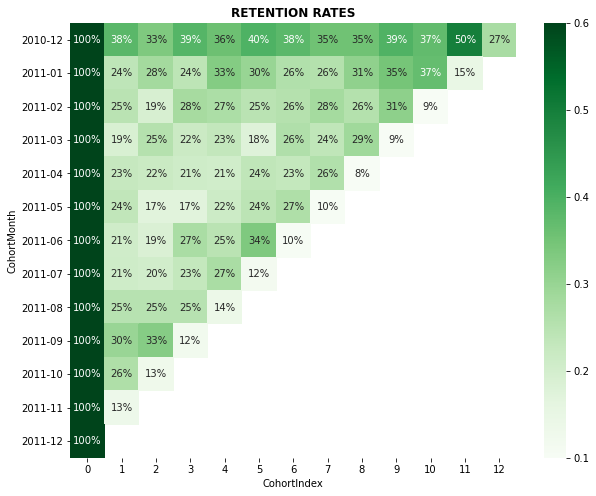

In [11]:
plt.figure(figsize=(10,8))
plt.title('RETENTION RATES', fontweight='bold')
sns.heatmap(retention, annot=True, fmt='.0%', vmin=.1, vmax=.6, cmap='Greens',
           yticklabels=retention.index.strftime('%Y-%m'))

plt.show()

## RFM Segmentation

In [12]:
snapshot_date = data.InvoiceDate.max() + dt.timedelta(days=1)

# Aggregate data on a customer level
datamart = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                          'InvoiceNo': 'count',
                                          'Sales': 'sum'})

# Rename columns
datamart.rename(columns={'InvoiceDate': 'Recency',
                        'InvoiceNo': 'Frequency',
                        'Sales': 'MonetaryValue'}, inplace=True)

datamart.sample(5)

,Recency,Frequency,MonetaryValue
CustomerID,,,
17451,2,107,1649
17926,134,21,397
13791,44,17,1048
16191,3,151,4913
16969,40,42,650


In [13]:
# Recency quartiles
r_quartiles = pd.qcut(datamart.Recency, 4, labels=range(4, 0, -1))
datamart = datamart.assign(R = r_quartiles.values)

# Frequency quartiles
f_quartiles = pd.qcut(datamart.Frequency, 4, labels=range(1, 5))
datamart = datamart.assign(F = f_quartiles.values)

# Monetary value quartiles
m_quartiles = pd.qcut(datamart.MonetaryValue, 4, labels=range(1, 5))
datamart = datamart.assign(M = m_quartiles.values)

# Building RFM segments
def rfm_seg(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

datamart['RFM_Segment'] = datamart.apply(rfm_seg, axis=1)

# RFM Score - Sum RFM values
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,326,2,0,1,1,1,1.01.01.0,3
12347,3,182,4310,4,4,4,4.04.04.0,12
12348,76,31,1797,2,2,4,2.02.04.0,8
12349,19,73,1758,3,3,4,3.03.04.0,10
12350,311,17,334,1,1,2,1.01.02.0,4
...,...,...,...,...,...,...,...,...
18280,278,10,181,1,1,1,1.01.01.0,3
18281,181,7,81,1,1,1,1.01.01.0,3
18282,8,13,177,4,1,1,4.01.01.0,6


In [14]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)

RFM_Segment
4.04.04.0    458
1.01.01.0    391
3.04.04.0    221
1.02.02.0    209
3.03.03.0    185
            ... 
1.02.04.0      6
1.04.02.0      4
4.01.04.0      3
2.04.01.0      1
4.04.01.0      1
Length: 62, dtype: int64

In [15]:
datamart.groupby('RFM_Score').agg({'Recency': 'mean',
                                  'Frequency': 'mean',
                                  'MonetaryValue': ['mean','count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3             266         8           109   391
4             176        14           227   390
5             153        21           344   520
6              95        29           492   466
7              80        40           725   447
8              63        57           972   466
9              45        79          1362   418
10             32       115          1898   437
11             21       200          3994   379
12              7       373          8890   458

In [16]:
def segment_label(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 6) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'
    
datamart['Segment'] = datamart.apply(segment_label, axis=1)

In [17]:
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12346,326,2,0,1,1,1,1.01.01.0,3,Bronze
12347,3,182,4310,4,4,4,4.04.04.0,12,Gold
12348,76,31,1797,2,2,4,2.02.04.0,8,Silver
12349,19,73,1758,3,3,4,3.03.04.0,10,Gold
12350,311,17,334,1,1,2,1.01.02.0,4,Bronze
...,...,...,...,...,...,...,...,...,...
18280,278,10,181,1,1,1,1.01.01.0,3,Bronze
18281,181,7,81,1,1,1,1.01.01.0,3,Bronze
18282,8,13,177,4,1,1,4.01.01.0,6,Silver


In [18]:
datamart.groupby('Segment').mean()

,Recency,Frequency,MonetaryValue,RFM_Score
Segment,,,,
Bronze,194,15,238,4
Gold,26,195,4127,11
Silver,79,42,730,7
